In [1]:
import logging
import pickle
import dill
import numpy as np
import matplotlib.pyplot as plt

#from src.emulator import Emulator
from src.emulator_BAND import EmulatorBAND

In [2]:
def loadEmulator(emulatorPathList):
        emuList = []
        for i, emuPath in enumerate(emulatorPathList):
            with open(emuPath, 'rb') as f:
                emu_i = dill.load(f)
                emuList.append(emu_i)
        logging.info("Number of Emulators: {}".format(len(emuList)))
        return emuList

In [3]:
#The EMULATOR and the DATA file have to FIT together
folder = "../actual/trained_emulators_no_PCA/"
emuPathList = [folder+"data:7.7:05_200:all:3.0:2.0_nolog_nopca_PCGP"
            ]

emu_list = loadEmulator(emuPathList)

[INFO][480296221] Number of Emulators: 1


In [4]:
#TODO: Redo in the center of posterior distribution!!!

file_path = '../actual/latent_train/data:7.7:05_200:all:3.0:2.0.pkl'

with open(file_path,'rb') as file:
    loaded_data = pickle.load(file)

In [31]:
# for key in loaded_data.keys():
#     a = key

# #print(loaded_data.keys())
# #print(a)
# #HERE WE CHOOSE WHICH INDEX!!!
# a=498
# num_obs = len(loaded_data[a]['obs'][0])
# #print(num_obs)
# num_param = len(loaded_data[a]['parameter'])
# #print(num_param)
# response_matrix = np.zeros((num_obs, num_param))

# X = np.array(loaded_data[a]['parameter'],  ndmin = 2)
# #print(X.shape)
# for j in range(num_param):
#     #print("j is ", j)
#     X_h_1 = np.copy(X)
#     X_h_2 = np.copy(X)
#     #print(X_h_1)
#     h = 0.1*X_h_1[0,j]
#     X_h_1[0, j] = X_h_1[0, j] + h
#     X_h_2[0, j] = X_h_2[0, j] - h
#     #print(X_h_1)
#     Y_h_1 = []
#     Y_h_2 = []
#     for emu in emu_list:
#         Y_h_1.append(emu.predict(X_h_1, return_cov = False))
#         #print("Y_h_1 is ", Y_h_1)
#         #print(len(Y_h_1))
#         Y_h_2.append(emu.predict(X_h_2, return_cov = False))
#         #print(len(Y_h_2))
#     Y_h_1_ = np.concatenate(Y_h_1, axis = 1)
#     #print(Y_h_1_.shape)
#     Y_h_2_ = np.concatenate(Y_h_2, axis = 1)
#     #print(Y_h_2_.shape)
#     #print(h.shape)
#     #print(X[0, j].shape)
#     #print(response_matrix[:, j].shape)
    
#     response_matrix[:, j] = (Y_h_1_[0,:] - Y_h_2_[0,:])/(2*h)*X[0, j]/(Y_h_1_[0,:]+Y_h_2_[0,:])*2
        

In [5]:
PARAMETER_NAMES = [
r'$\tau_{IC,scale}\;[{\rm fm}]$',
r'$a_{h,\eta}$',
r'$a_{l,\eta}$',
r'$\epsilon_{\rm sw}\;[{\rm GeV/fm^3}]$',
r'$(\eta/s)_{\rm min}$',
r'$a_{\mu_B}$',
r'$b_{\mu_B}$',
r'$R_{\rm g}$',
r'$R_{\rm z}$',
r'$T_{\eta, \rm 0}\;[{\rm GeV}]$',
r'$(\zeta/s)_{\rm 0}$',
r'$(\epsilon)_{\zeta,\rm 0 }\;[{\rm GeV/fm^3}]$',
r'$\sigma_{\zeta, \rm -}\;[{\rm GeV}]$',
r'$\sigma_{\zeta, \rm +}\;[{\rm GeV}]$',
r'$\sigma_{\rm AB, scale}$',
]

x = np.arange(len(PARAMETER_NAMES))

In [16]:
def extract_info_from_filename(filename):
    # Remove the path and extension
    parts = filename.split('_')
    
    # Extract energy, centrality, and observable
    energy = parts[1]
    centrality = parts[2]
    observable = '_'.join(parts[3:])


    
    return energy, centrality, observable

import re

def convert_to_notation(filename):
    # Remove 'exp_', '../latent_pickled/', and '.pkl'
    filename = re.sub(r'(exp_|\.pkl|../latent_pickled/)', '', filename)
    filename = re.sub(r'star_v(.*)_pT', r'starv\1pt', filename)
    filename = re.sub(r'star_v', 'starv', filename)
    filename = re.sub(r'phenix_pT_v', 'phenixptv', filename)
    
    filename = re.sub(r'eta_spectra', 'etas', filename)
    filename = re.sub(r'y_spectra', 'ys', filename)
    filename = re.sub(r'pT_spectra', 'pTs', filename)
    filename = re.sub(r'phobos_v2_spectra', 'v2eta', filename)
    # Mapping for observables
    observables = {
        'etas': r'$\frac{dN}{d\eta}$',
        'ys': r'$\frac{dN}{dy}$',
        'pTs': r'$\frac{dN}{d(p_T)}$',
        'dNdy': r'$\left.\frac{dN}{dy}\right|_{y=0}$',
        'meanpT': r'$\langle p_T \rangle |_{y=0}$',
        'starv2': r'$\left.v_{2/3}\right.\{2\}$',
        'starv3': r'',
        'phenixptv2': r'$v_2(p_T)$',
        'phenixptv3': r'$v_3(p_T)$',
        'starv2pt': r'$v_2(p_T)$',
        'starv3pt': r'$v_3(p_T)$',
        'v2eta': r'$v_2(\eta)$'
    }
    particles= {
        'kminus': r'K^-',
        'kplus': r'K^+',
        'p': 'p',
        'pbar': r'\bar{p}',
        'piminus': r'\pi^-',
        'piplus': r'\pi^+'
    }   
    
    # Identify the particle and the observable
    #print(filename)
    parts = filename.split('_')
    #print(parts)
    particle = ''
    observable = ''
    integrated = False
    for part in parts:
        if part in observables:
            observable = observables[part]
        elif part in particles:
            particle = particles[part]
        elif part == 'integrated':
            integrated = True
    # Add particle notation for y_spectra
    if integrated and particle == 'p':
        pass
    elif integrated and particle != '':
        observable=''
    elif ('ys' in filename or 'pTs' in filename or integrated) and not 'star' in filename:
        observable = observable[:-1] + f'({particle})$'

   
    #print(observable)
    #print("------")
    # Return the formatted string
    return observable

from collections import defaultdict
import numpy as np

# Extract relevant information and store in a list of tuples
data_list = []
for i, name in enumerate(loaded_data[0]["name"]):
    energy, centrality, observable = extract_info_from_filename(name)
    start = loaded_data[0]["lim"][i]
    end = loaded_data[0]["lim"][i + 1]
    data_list.append((energy, centrality, observable, start, end, i))

# Define a custom order for the energy
energy_order = {'7.7': 0, '19.6': 1, '200': 2}

# Sort the list of tuples by the custom energy order and then by centrality
data_list.sort(key=lambda x: (energy_order[x[0]], x[1]))

# Recalculate ytickPos based on the sorted order
yticksLabel = []
ytickPos = []
yInfo = []
current_pos = 0
for energy, centrality, observable, start, end, original_index in data_list:
    space = end - start
    mid_pos = current_pos + space / 2
    yticksLabel.append(convert_to_notation(observable))
    ytickPos.append(mid_pos)
    yInfo.append((energy, centrality, space / 2))
    current_pos += space
for i in range(len(yInfo)):
    print(yInfo[i])
# Calculate the response matrix
a = 498
num_obs = len(loaded_data[a]['obs'][0])
num_param = len(loaded_data[a]['parameter'])

response_matrix = np.zeros((num_obs, num_param))

X = np.array(loaded_data[a]['parameter'], ndmin=2)
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_scaled = (X - X_min) / (X_max - X_min + 1e-8)
for j in range(num_param):
    X_h_1 = np.copy(X_scaled)
    X_h_2 = np.copy(X_scaled)
    h = 0.1 * X_h_1[0, j]
    if h == 0:
        h = 1e-8  # Set a small epsilon if h is zero
    X_h_1[0, j] = X_h_1[0, j] + h
    X_h_2[0, j] = X_h_2[0, j] - h
    Y_h_1 = []
    Y_h_2 = []
    for emu in emu_list:
        Y_h_1.append(emu.predict(X_h_1, return_cov=False))
        Y_h_2.append(emu.predict(X_h_2, return_cov=False))
    Y_h_1_ = np.concatenate(Y_h_1, axis=1)
    Y_h_2_ = np.concatenate(Y_h_2, axis=1)
    denominator = (Y_h_1_[0, :] + Y_h_2_[0, :])
    small_value_mask = np.abs(denominator) < 1e-8  # Mask small or zero denominators
    
    # Safely calculate the response matrix with masked values
    safe_denominator = np.where(small_value_mask, 1e-8, denominator)  # Avoid division by zero
    
    response_matrix[:, j] = (Y_h_1_[0, :] - Y_h_2_[0, :]) / (2 * h) * X[0, j] / safe_denominator * 2
    response_matrix[:, j] = (Y_h_1_[0, :] - Y_h_2_[0, :]) / (2 * h) * X[0, j] / (Y_h_1_[0, :] + Y_h_2_[0, :]) * 2

# Apply the same sorting to the response matrix
sorted_response_matrix = np.zeros_like(response_matrix)
current_pos = 0
for energy, centrality, observable, start, end, original_index in data_list:
    space = end - start
    sorted_response_matrix[current_pos:current_pos + space, :] = response_matrix[start:end, :]
    current_pos += space

print(yticksLabel)
print(ytickPos)
response_matrix = sorted_response_matrix

('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 0.5)
('7.7', '05', 10.5)
('7.7', '05', 10.5)
('7.7', '05', 10.0)
('7.7', '05', 6.5)
('7.7', '05', 11.0)
('7.7', '05', 11.0)
['', '', '$\\left.\\frac{dN}{dy}\\right|_{y=0}$', '', '', '', '', '', '$\\langle p_T \\rangle |_{y=0}$', '', '', '', '$\\left.v_{2/3}\\right.\\{2\\}$', '', '$\\frac{dN}{d(p_T)}(K^-)$', '$\\frac{dN}{d(p_T)}(K^+)$', '$\\frac{dN}{d(p_T)}(p)$', '$\\frac{dN}{d(p_T)}(\\bar{p})$', '$\\frac{dN}{d(p_T)}(\\pi^-)$', '$\\frac{dN}{d(p_T)}(\\pi^+)$']
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 24.5, 45.5, 66.0, 82.5, 100.0, 122.0]


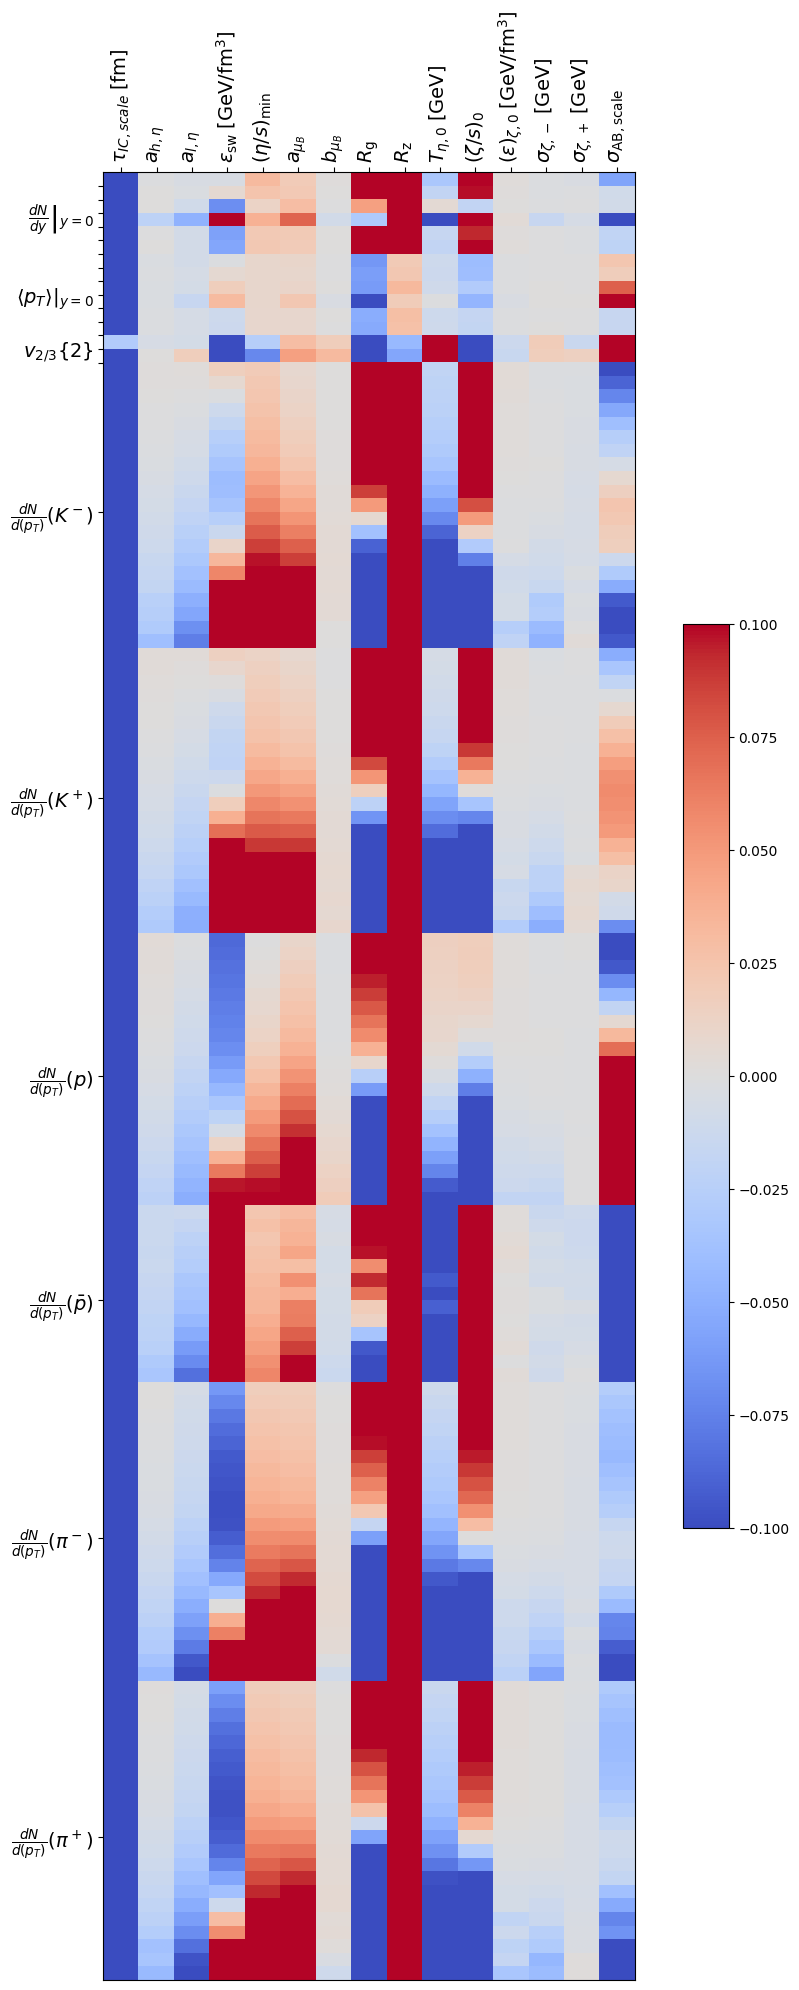

In [7]:
#UNSPLIT

min_value = np.amin(response_matrix)
max_value = np.amax(response_matrix)
c_value = max(min_value, max_value)

height, width = response_matrix.shape
aspect_ratio = 3.4*((width)/(height))

# Split the response matrix into two parts
half_width = width // 2
response_matrix_1, response_matrix_2 = np.hsplit(response_matrix, [half_width])

plt.figure(figsize=(10, 20))
plt.imshow(response_matrix, cmap='coolwarm', vmin=-0.1, vmax=0.1, aspect = aspect_ratio, interpolation = 'nearest')
# Add color bar
plt.colorbar(shrink=0.5)  # Adjust shrink value as needed

#yticksLabel=[convert_to_notation(name) for name in data[:][:]["name"]]
#ytickPos=[(start + end) // 2  - 1 for start, end in zip(data[:][:]["lim"][:-1], data[:][:]["lim"][1:])]

# ytickPos = [3, 10, 17, 24, 31, 38, 45, 52, 58, 64, 83, 116, 152, 189, 223,
#             245, 254, 262, 268, 276, 283, 290, 297, 303, 310, 330, 364,
#             398, 433, 468, 486, 493, 500, 507, 514, 521, 528, 534, 540]
# yticksLabel = [r"$dN/dy(\pi^+)$",
#                r"$dN/dy(K^+)$", r"$dN/dy(p)$",
#                r"$dN/dy(\bar{p})$", r"$\langle p_T \rangle(\pi^+)$",
#                r"$\langle p_T \rangle(K^+)$",
#                r"$\langle p_T \rangle(p)$",
#                r"$\langle p_T \rangle(\bar{p})$",
#                r"$v_2\{2\}({\rm ch})$",
#                r"$v_3\{2\}({\rm ch})$",
#                r"$dN^{\rm ch}/d\eta(0-5\%)$",
#                r"$dN^{\rm ch}/d\eta(5-12\%)$",
#                r"$dN^{\rm ch}/d\eta(12-24\%)$",
#                r"$dN^{\rm ch}/d\eta(24-34\%)$",
#                r"$dN^{\rm ch}/d\eta(34-44\%)$",
#                r"$v_2(\eta)(0-40\%)$",
#                r"$dN/dy(\pi^+)$",
#                r"$dN/dy(K^+)$", r"$dN/dy(p)$",
#                r"$\langle p_T \rangle(\pi^+)$",
#                r"$\langle p_T \rangle(K^+)$",
#                r"$\langle p_T \rangle(p)$",
#                r"$\langle p_T \rangle(\bar{p})$",
#                r"$v_2\{2\}({\rm ch})$",
#                r"$v_3\{2\}({\rm ch})$",
#                r"$dN^{\rm ch}/d\eta(0-5\%)$",
#                r"$dN^{\rm ch}/d\eta(5-12\%)$",
#                r"$dN^{\rm ch}/d\eta(12-24\%)$",
#                r"$dN^{\rm ch}/d\eta(24-34\%)$",
#                r"$dN^{\rm ch}/d\eta(34-44\%)$",
#                r"$dN/dy(\pi^+)$",
#                r"$dN/dy(K^+)$", r"$dN/dy(p)$",
#                r"$\langle p_T \rangle(\pi^+)$",
#                r"$\langle p_T \rangle(K^+)$",
#                r"$\langle p_T \rangle(p)$",
#                r"$\langle p_T \rangle(\bar{p})$",
#                r"$v_2\{2\}({\rm ch})$",
#                r"$v_3\{2\}({\rm ch})$",
#              ]

ax = plt.gca()
ax.xaxis.tick_top()
ax.set_yticks(ytickPos)
ax.set_yticklabels(yticksLabel, rotation=0)
plt.yticks(fontsize = 14)
plt.xticks(x, PARAMETER_NAMES, fontsize=14, rotation = 90)
plt.tight_layout()
plt.savefig("heatmap_1099.pdf")
plt.show()


/tmp/ipykernel_40787/294926055.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


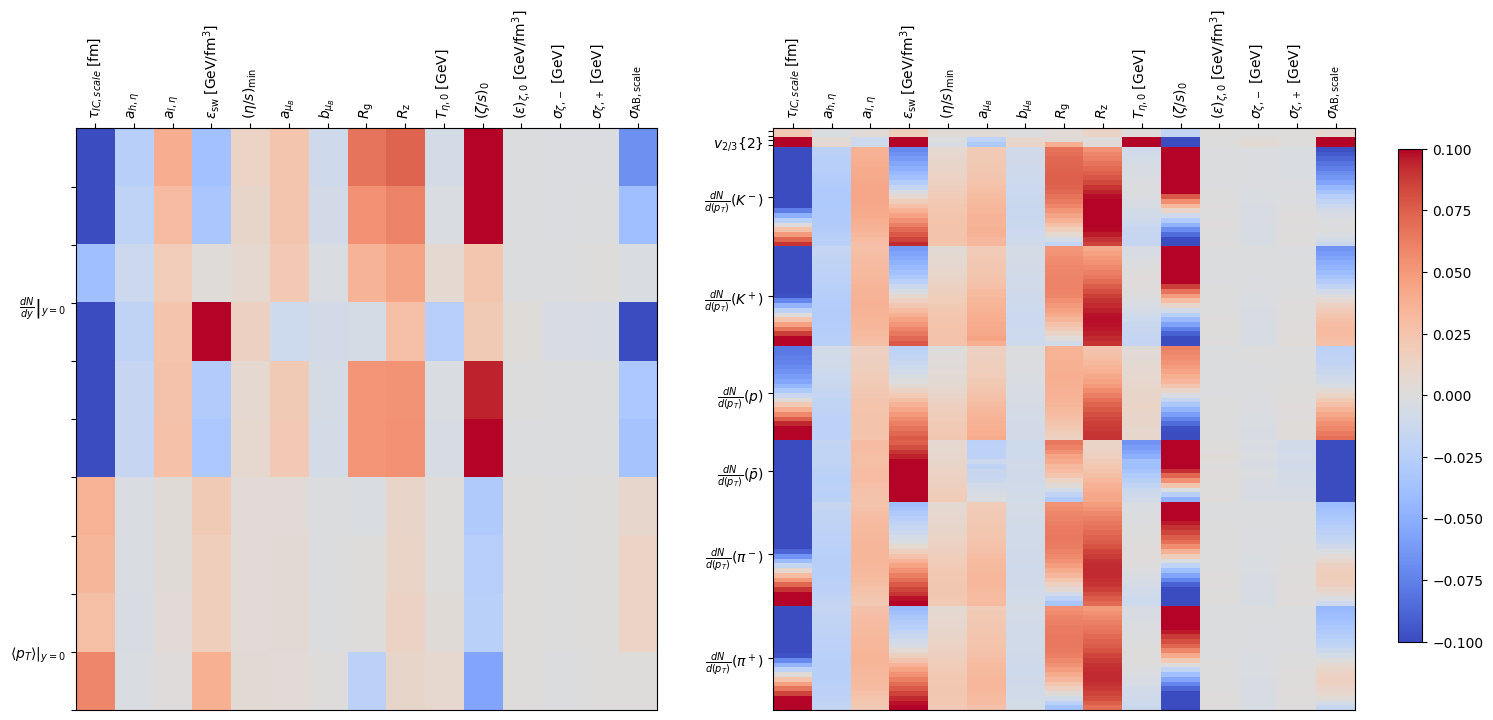

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate halfway point in observables (rows)
half_height = len(yticksLabel) // 2

# Split the response matrix by rows (observables)
response_matrix_1, response_matrix_2 = np.vsplit(response_matrix, [half_height])

# Split yticksLabel and ytickPos into two halves
yticksLabel_1 = yticksLabel[:half_height]
ytickPos_1 = ytickPos[:half_height]

yticksLabel_2 = yticksLabel[half_height:]
ytickPos_2 = [pos - ytickPos[half_height] for pos in ytickPos[half_height:]]  # Adjust positions for second half

# Create two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Shrink figure size for less empty space

# Plot the first half of the response matrix (left observables)
aspect_ratio_1 = response_matrix_1.shape[1] / response_matrix_1.shape[0]  # Adjust dynamically
im1 = axs[0].imshow(response_matrix_1, cmap='coolwarm', vmin=-0.1, vmax=0.1, aspect=aspect_ratio_1, interpolation='nearest')
axs[0].xaxis.tick_top()
axs[0].set_yticks(ytickPos_1)
axs[0].set_yticklabels(yticksLabel_1, rotation=0, fontsize=10)  # Smaller fontsize to reduce space

# Plot the second half of the response matrix (right observables)
aspect_ratio_2 = response_matrix_2.shape[1] / response_matrix_2.shape[0]  # Adjust dynamically
im2 = axs[1].imshow(response_matrix_2, cmap='coolwarm', vmin=-0.1, vmax=0.1, aspect=aspect_ratio_2, interpolation='nearest')
axs[1].xaxis.tick_top()
axs[1].set_yticks(ytickPos_2)
axs[1].set_yticklabels(yticksLabel_2, rotation=0, fontsize=10)  # Smaller fontsize to reduce space

# Add a colorbar to the right of the subplots
cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.03, pad=0.1, shrink=0.8)  # Adjust pad for positioning

# Set x-ticks for both subplots (assuming PARAMETER_NAMES is a defined list of parameter names)
x = np.arange(len(PARAMETER_NAMES))  # Set the tick positions
axs[0].set_xticks(x)
axs[0].set_xticklabels(PARAMETER_NAMES, fontsize=10, rotation=90)  # Adjust fontsize and rotation
axs[1].set_xticks(x)
axs[1].set_xticklabels(PARAMETER_NAMES, fontsize=10, rotation=90)

# Adjust layout to make room for colorbar
plt.tight_layout()
plt.subplots_adjust(right=0.85, wspace=0.2)  # Make room on the right for the colorbar

# Save the figure
plt.savefig("heatmap_split_observables_colorbar_right_scaled.pdf")
plt.show()
